In [1]:
import numpy as np 
import pandas as pd
import pickle
import lightgbm as lgb

from apreproces_data import create_application_features
from amodel_evaluate import evaluate_model_on_test

In [2]:
df_test_fe = pd.read_parquet('df_test_fe', engine='pyarrow')
df_test_dpi = pd.read_parquet('df_test_dpi', engine='pyarrow')

In [3]:
df_test = create_application_features(df_test_dpi, df_test_fe)

In [4]:
df_test

,target,loc_market_share,voice_in_td_cnt_mea_mnt1,lt,device_days_usage,sms_in_cnt_std_mnt3,Balance_uah,all_cnt_std_mnt3,days_of_end_last_ppm,conn_out_uniq_cnt_mea_mnt1,...,882_duration,272_duration,254_duration,877_duration,897_duration,381_duration,2018_duration,677_duration,1414_duration,992_duration
0,0,1.150370,6.965059,6.116815,36.410147,1.251589,8.369994,6.549250,-10.831324,2.023336,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,1.007682,16.650252,6.120519,62.296882,3.659777,26.691497,10.405453,-11.361162,10.412949,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,1.186492,15.014574,6.126654,37.853857,2.201389,27.778361,12.859059,-5.827796,7.479729,...,45.583444,64.143106,164.130145,96.172227,93.044237,103.601254,18.679440,112.713676,166.488207,0.000000
3,0,1.186492,15.741394,6.133872,67.102649,4.001041,25.608262,8.328843,0.000000,8.151071,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,1.089929,13.065328,6.116295,34.237428,19.263735,1.189380,26.407109,-9.027098,7.174761,...,77.786707,72.206028,183.589548,135.223962,186.456975,171.687614,62.957540,134.908472,120.259516,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1,1.035771,14.607832,3.259914,13.640500,1.207705,22.659347,16.551197,1.480453,4.924367,...,48.647857,0.000000,40.723006,81.899603,118.953333,100.318203,17.346264,89.674313,152.704107,0.000000
149996,0,1.022517,9.746872,3.279853,12.103587,2.365532,1.480453,12.520617,2.206949,6.749902,...,36.222969,0.000000,164.298431,66.444689,0.000000,119.646734,30.666948,79.812864,97.402435,0.000000
149997,0,1.063584,7.379305,3.336089,14.421684,1.369602,22.335927,11.295128,-11.615193,7.070573,...,38.048827,27.966801,141.518023,87.015261,0.000000,145.928466,44.665672,121.162169,111.833875,0.000000
149998,0,1.063584,4.059700,3.299172,14.038728,1.696520,9.231360,9.106349,-12.338681,1.480453,...,46.306605,36.065091,183.375275,77.868791,40.038040,129.118956,33.264361,99.071141,130.760688,82.854555


In [5]:
model_filename = 'best_model_auc.pkl'

with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

print("Модель завантажено успішно!")

Модель завантажено успішно!


In [6]:
model = lgb.LGBMClassifier()
model = loaded_model

Час роботи моделі: 1.7785930633544922
AUC: 0.8971
Recall: 0.7162
FP/TP Ratio: 1.9868
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94    140597
           1       0.33      0.72      0.46      9403

    accuracy                           0.89    150000
   macro avg       0.66      0.81      0.70    150000
weighted avg       0.94      0.89      0.91    150000

Confusion Matrix:
[[127218  13379]
 [  2669   6734]]


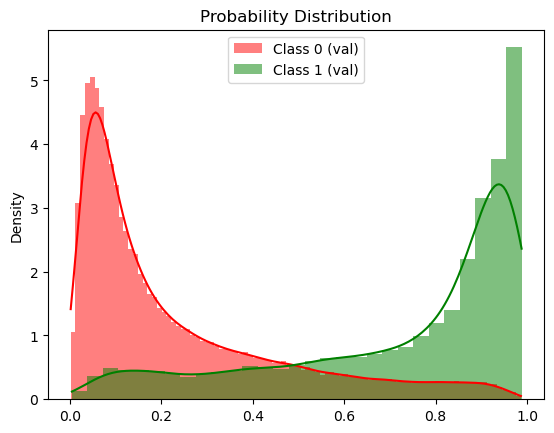

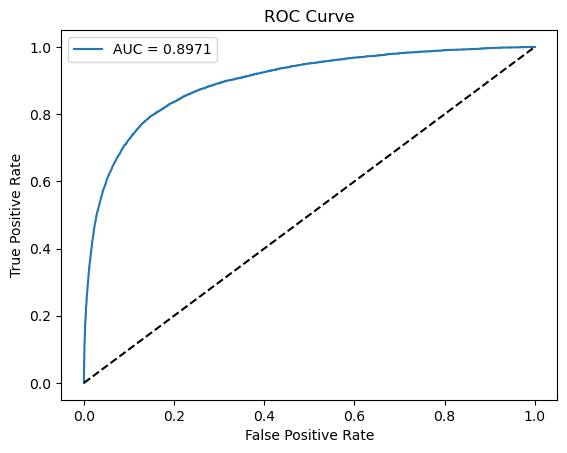

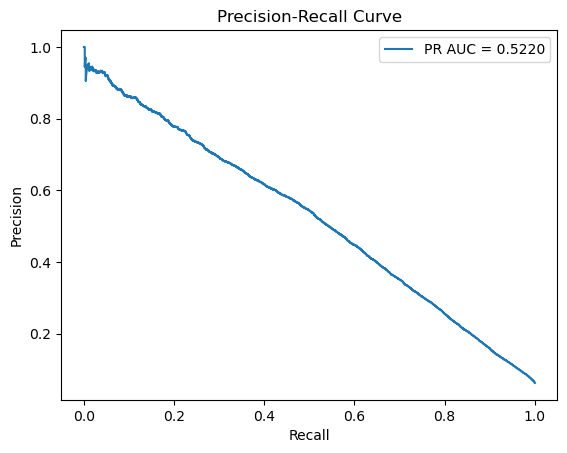

In [7]:
evaluate_model_on_test(model, df_test)